# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">CUSTOMER CHURN PREDICTION</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

### Loading the CSV File

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Insights:**

* The dataset shows that only 16.2% of customers are senior citizens, indicating a younger customer base. The average tenure is 32.37 months, but it varies significantly, ranging from 0 to 72 months, suggesting a mix of new and long-term customers. Monthly charges average $64.76, with a wide range from $18.25 to $118.75, highlighting diverse pricing plans.

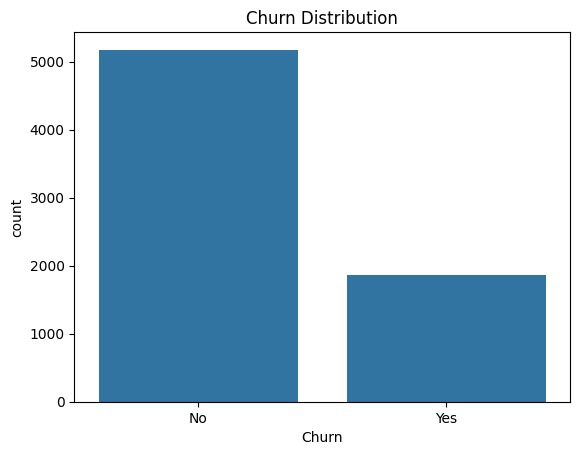

In [9]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

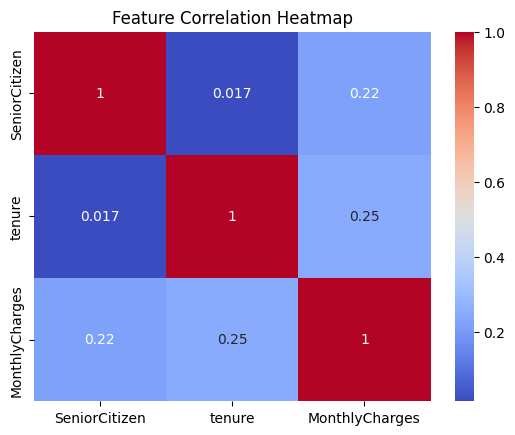

In [10]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

* Low correlation between features – No strong relationships exist among the variables.

* Tenure and MonthlyCharges (0.25 correlation) – Customers with longer tenure tend to have slightly higher monthly charges.

* SeniorCitizen and MonthlyCharges (0.22 correlation) – Senior citizens might have slightly higher charges, but the relationship is weak.

* SeniorCitizen and Tenure (0.017 correlation) – Almost no correlation, meaning senior citizens are not necessarily staying longer or shorter.

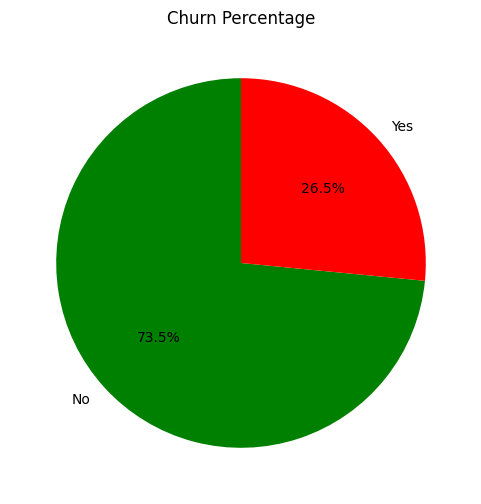

In [11]:
churn_counts = df["Churn"].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.1f%%", colors=["green", "red"], startangle=90)
plt.title("Churn Percentage")
plt.show()

* Churn Rate Insight: Around 26.5% of customers have churned, while 73.5% have stayed. This indicates that a significant portion of customers are leaving, highlighting the need to analyze churn factors and improve retention strategies

In [12]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

* Ratio = 73:27 (Imbalanced)

#### Checking and Fixing of Missing Values

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Cleaning

#### We are creating a copy for manipulation of data

In [14]:
df_telco = df.copy()

In [15]:
df_telco.TotalCharges = pd.to_numeric(df_telco.TotalCharges,errors='coerce')
df_telco.MonthlyCharges = pd.to_numeric(df_telco.MonthlyCharges,errors='coerce')
df_telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* We have 11 missing values in Total Charges 

#### Now we will deal with the Missing Values

In [16]:
df_telco.loc[df_telco ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
df_telco.dropna(how='any',inplace=True)

In [18]:
df_telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df_telco['tenure'].max()

np.int64(72)

In [20]:
df_telco['tenure'].min()

np.int64(1)

#### We wil arrange and divides the tenure in ranges

In [21]:
df_telco['tenure'].isnull().sum()


np.int64(0)

In [22]:
bins = [0, 12, 24,36, 48,60, 72]
labels = ['0-1 year', '1-2 years', '2-3 years','3-4 years','4-5 years', '5-6 years']
df_telco['tenure_group'] = pd.cut(df_telco['tenure'], bins=bins, labels=labels)


In [23]:
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year


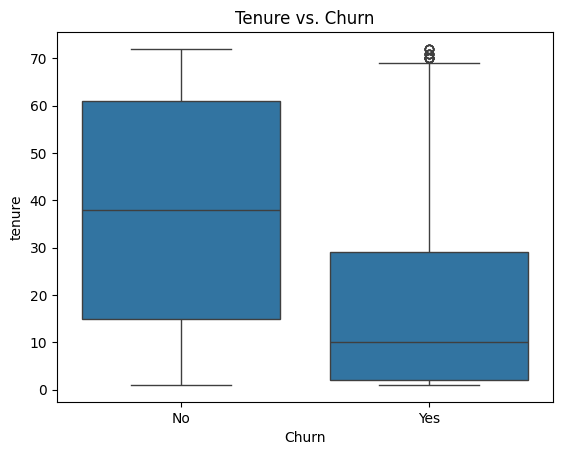

In [24]:
sns.boxplot(x='Churn', y='tenure', data=df_telco)
plt.title("Tenure vs. Churn")
plt.show()


In [25]:
df_telco.drop(columns=['customerID', 'tenure'], inplace=True)


## Univariate Analysis

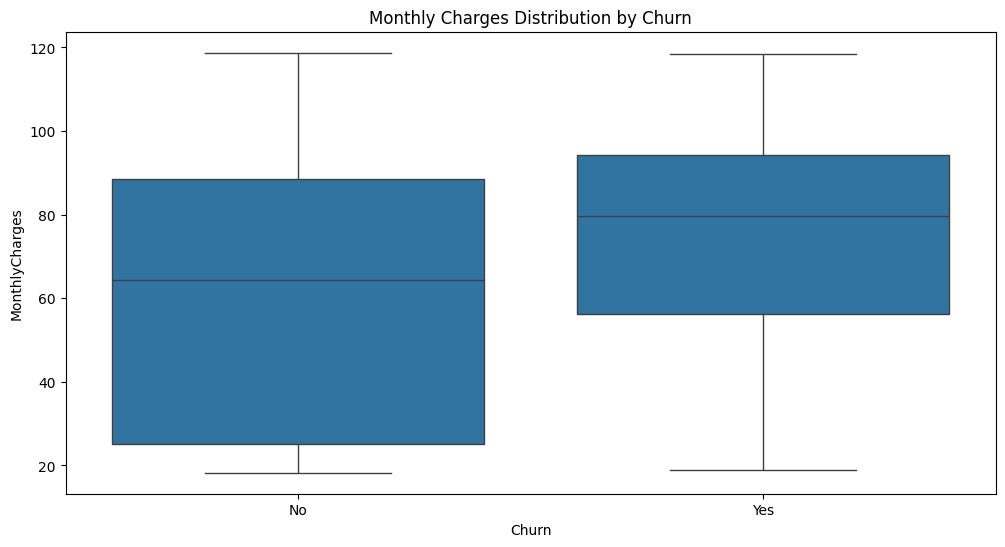

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_telco, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges Distribution by Churn")
plt.show()


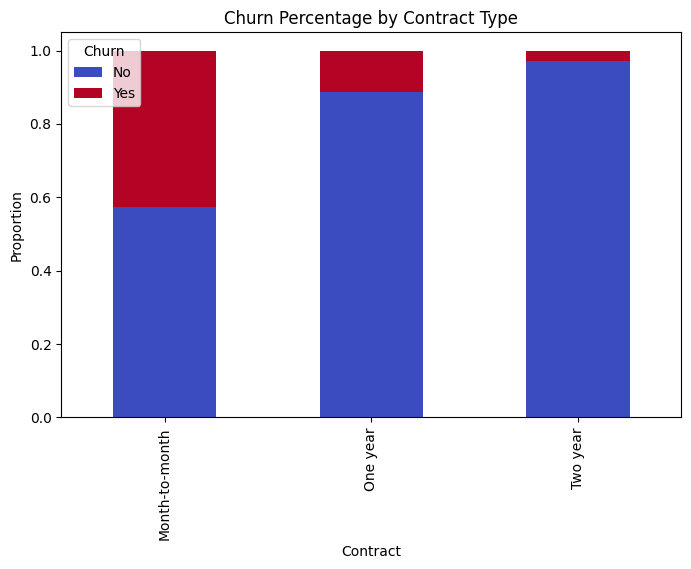

In [27]:
contract_churn = df_telco.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,5))
plt.title("Churn Percentage by Contract Type")
plt.ylabel("Proportion")
plt.show()


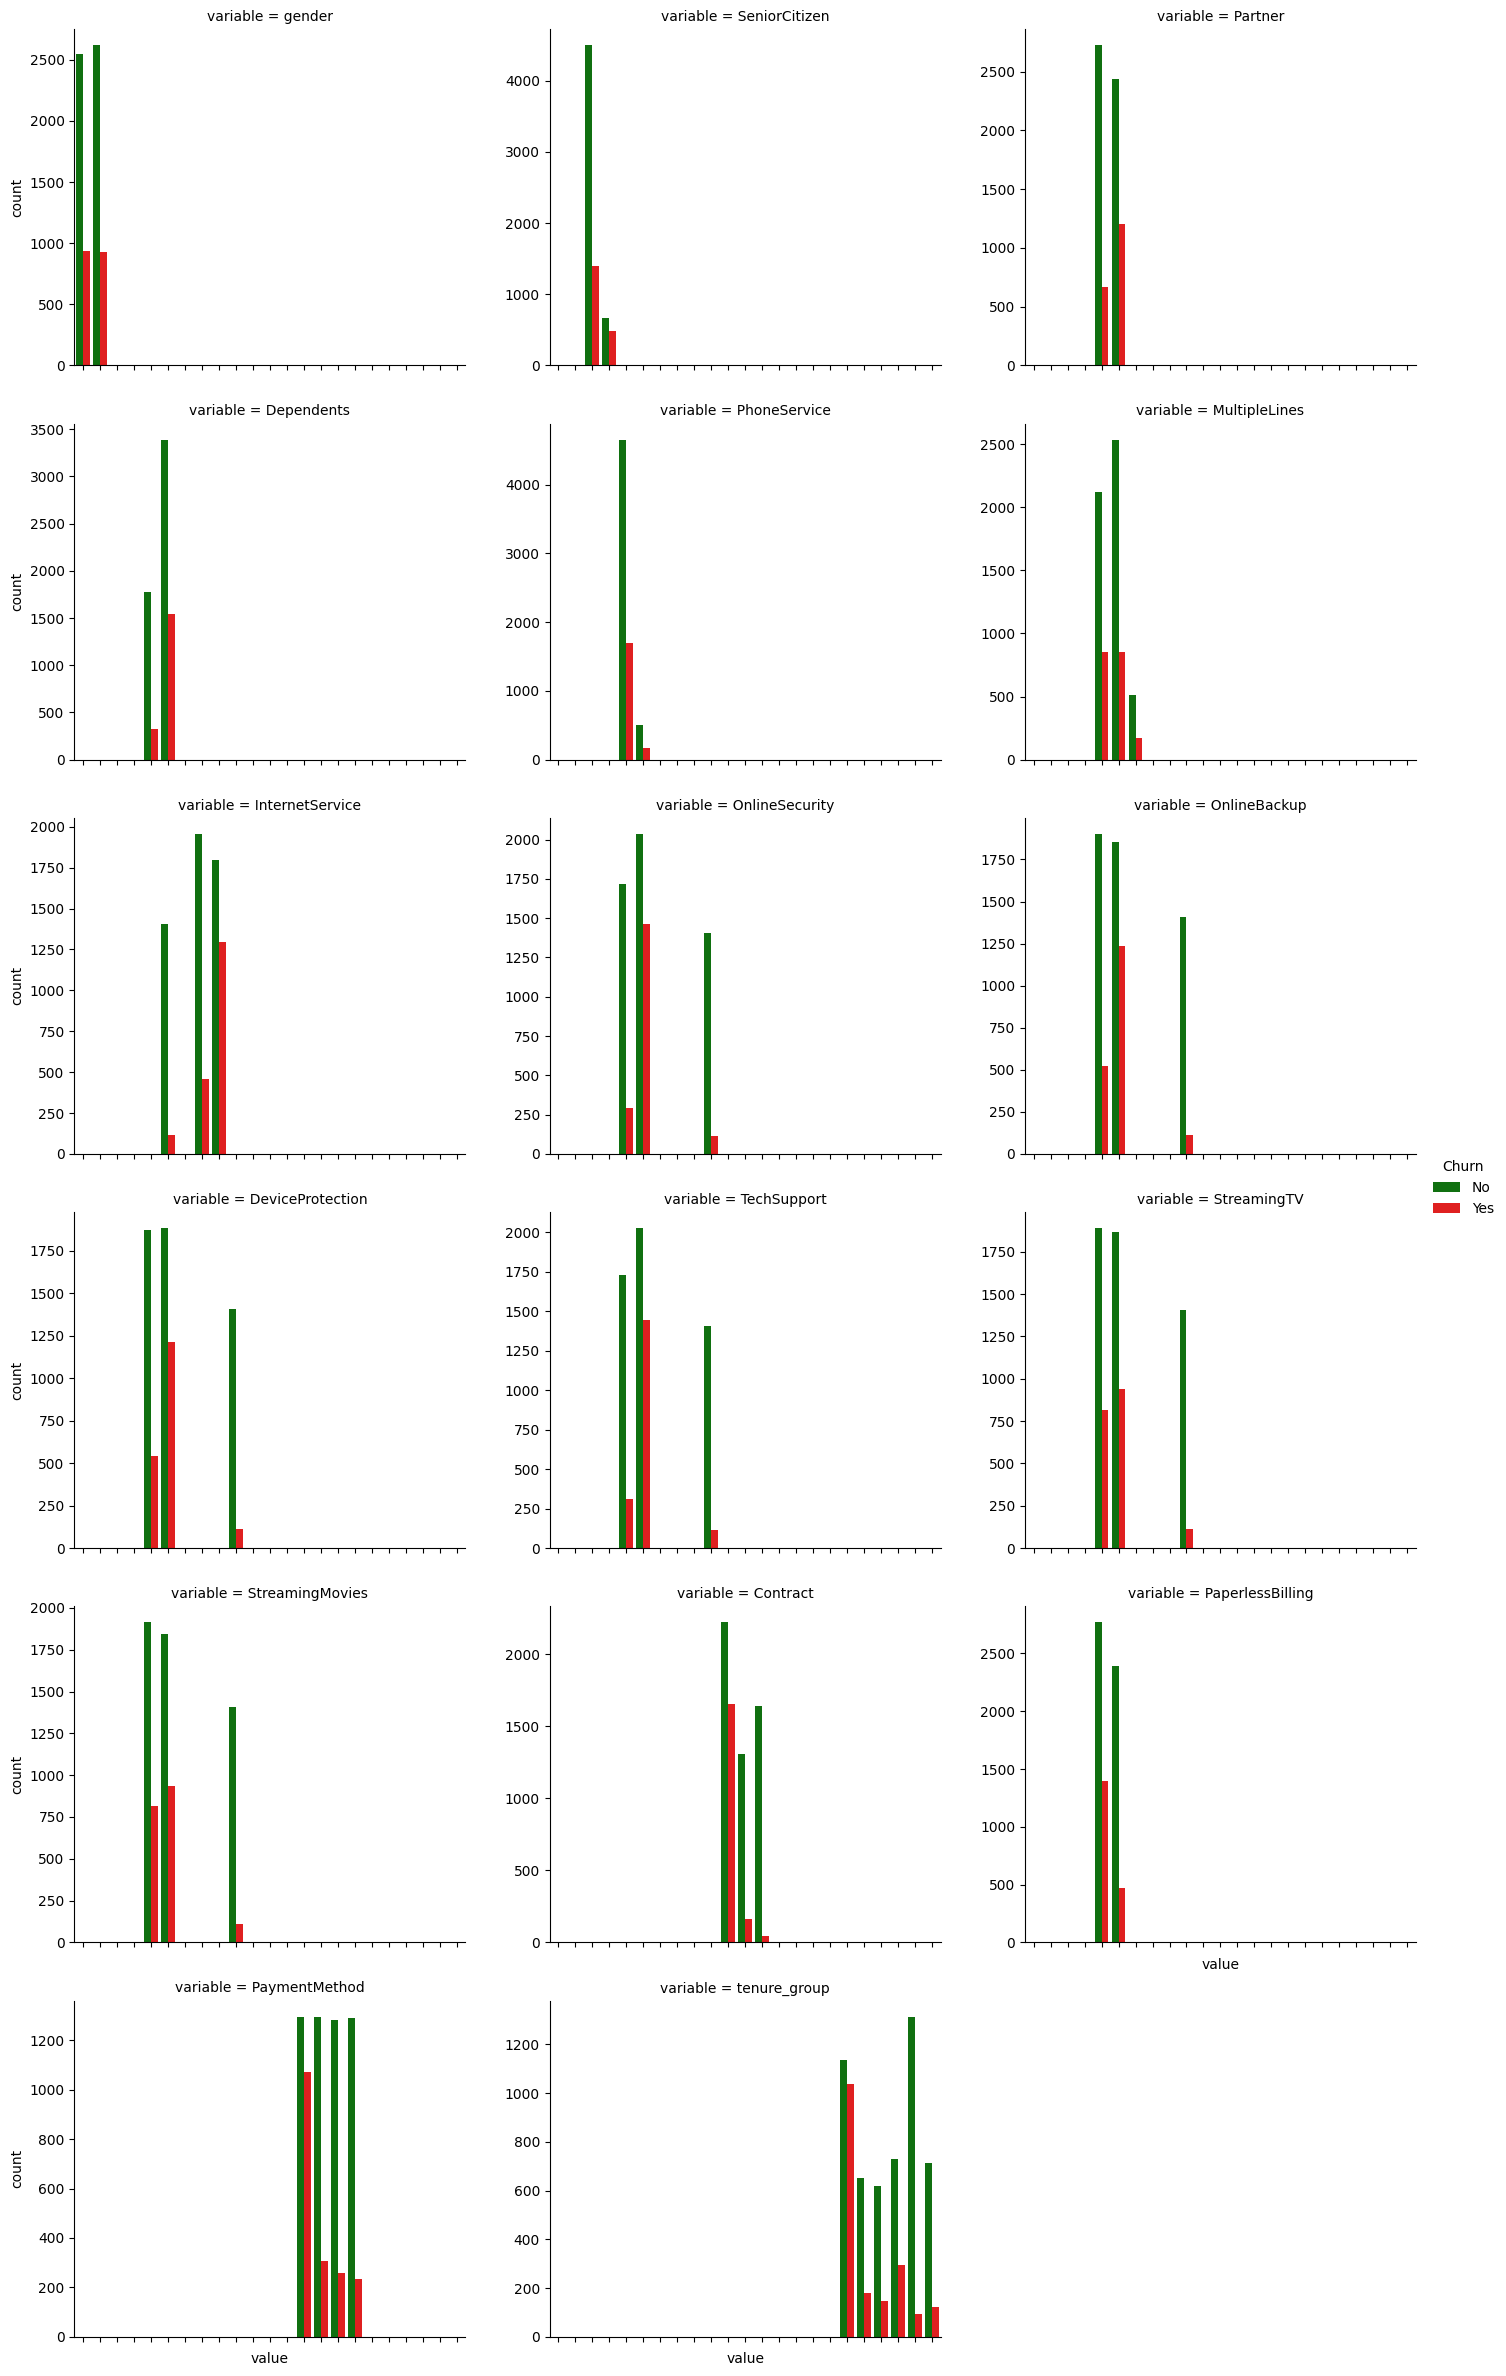

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=df_telco.melt(id_vars=['Churn'], 
                       value_vars=df_telco.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns),
    x='value', hue='Churn', col='variable',
    kind='count', palette=['green', 'red'],
    col_wrap=3, height=4, aspect=1.2, sharey=False  # Increased size & aspect
)

g.set_xticklabels(rotation=30)  # Rotate for better visibility
plt.show()


* Quick Insights from Churn Analysis:

* Senior Citizens Have Higher Churn → The proportion of red bars is higher for Senior Citizens, indicating they leave more frequently.

* Internet Service & Churn Correlation → Certain InternetService types (likely Fiber Optic) have a higher churn rate.

* Security & Support Impact → Features like OnlineSecurity, TechSupport, and DeviceProtection show lower churn when subscribed (green bars dominate).

* Contract Type Matters → Month-to-month contracts have higher churn compared to long-term contracts.

* Payment Method Influence → Electronic payments (Paperless Billing) seem to have more churn than traditional methods.

* Lower Tenure = Higher Churn → New customers (short tenure) are churning more often.

#### Converting  DTypes to Int

In [29]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

In [30]:
df_telco['Churn'] = np.where(df_telco.Churn == 'Yes',1,0).astype(int)

In [31]:
df_telco['Churn'].unique()

array([0, 1])

In [32]:
df_telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 year
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 years
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 year
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 years
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 year


Saving Columns

In [33]:
df_telco_encoded = pd.get_dummies(df_telco).astype(int)
df_telco_encoded.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0-1 year,tenure_group_1-2 years,tenure_group_2-3 years,tenure_group_3-4 years,tenure_group_4-5 years,tenure_group_5-6 years
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [34]:
df_telco_encoded.columns.values

array(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two ye

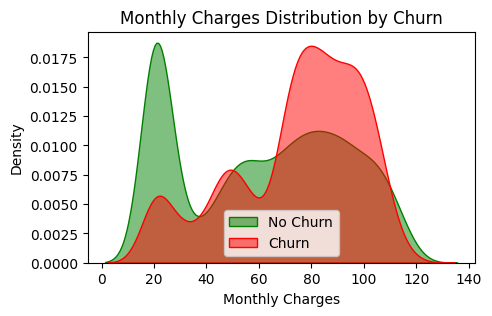

In [35]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df_telco[df_telco['Churn'] == 0]['MonthlyCharges'], label='No Churn', fill=True, color='green', alpha=0.5)
sns.kdeplot(df_telco[df_telco['Churn'] == 1]['MonthlyCharges'], label='Churn', fill=True, color='red', alpha=0.5)

plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Monthly Charges Distribution by Churn")
plt.legend()
plt.show()


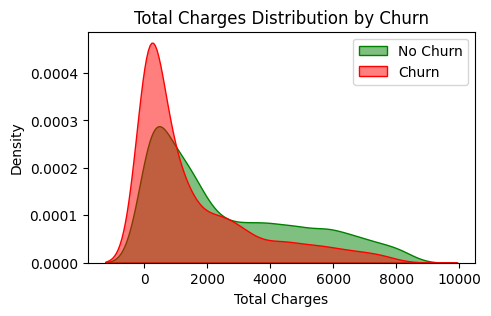

In [36]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df_telco[df_telco['Churn'] == 0]['TotalCharges'], label='No Churn', fill=True, color='green', alpha=0.5)
sns.kdeplot(df_telco[df_telco['Churn'] == 1]['TotalCharges'], label='Churn', fill=True, color='red', alpha=0.5)

plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.title("Total Charges Distribution by Churn")
plt.legend()
plt.show()


<Axes: >

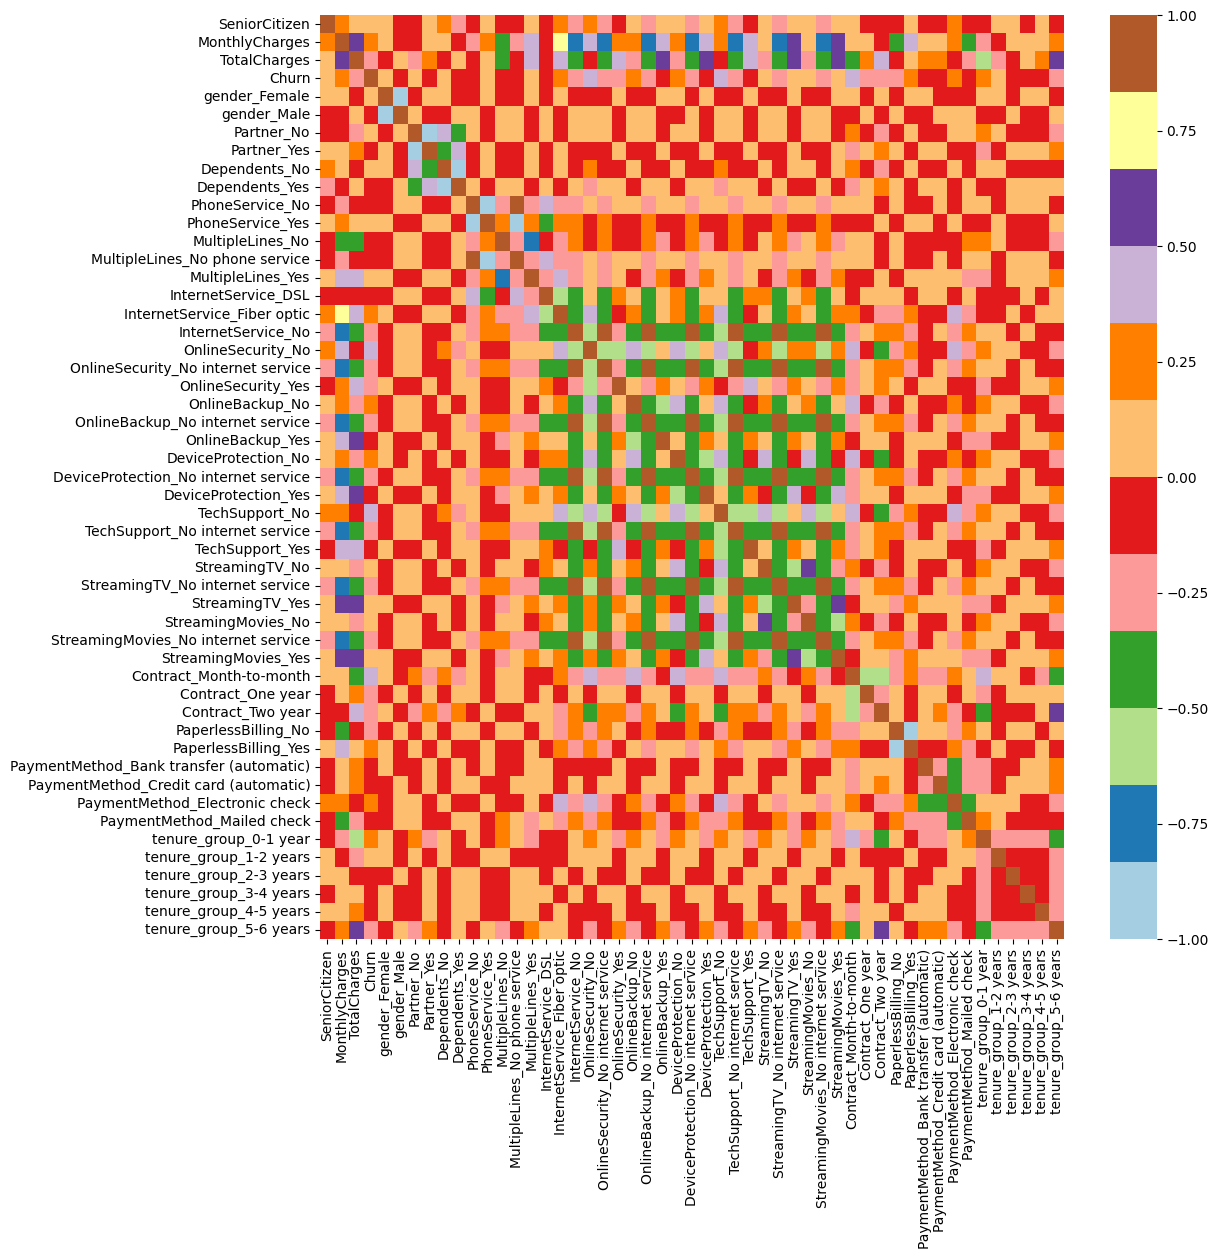

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(df_telco_encoded.corr(), cmap="Paired")

In [38]:
new_df1_target0=df_telco.loc[df_telco["Churn"]==0]
new_df1_target1=df_telco.loc[df_telco["Churn"]==1]

In [39]:
def custom_uniplot(df, col, title="Uniplot Analysis", hue="gender"):
    """
    Creates a univariate plot (countplot) for churned customers based on a categorical feature.
    
    Parameters:
    df (DataFrame): The dataset
    col (str): The categorical column to visualize
    title (str): Title of the plot
    hue (str): Column to differentiate groups (default: 'gender')
    """
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df[df["Churn"] == 1], x=col, hue=hue, palette="husl")
    
    plt.title(title, fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count of Churned Customers", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title=hue)
    
    plt.show()

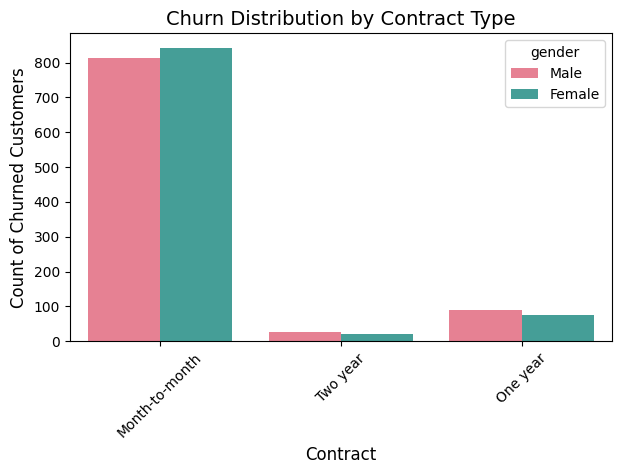

In [40]:
custom_uniplot(new_df1_target1, col='Contract', title="Churn Distribution by Contract Type",)

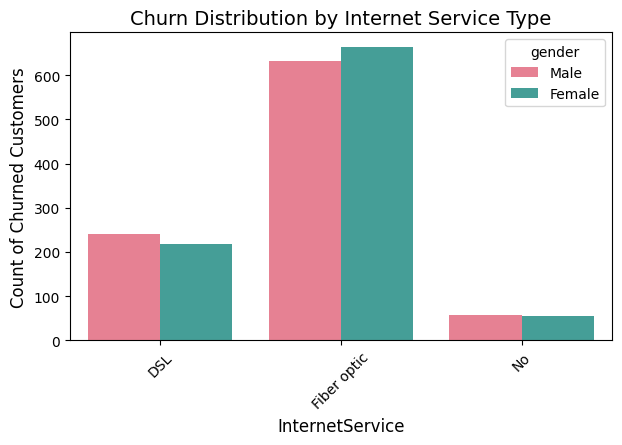

In [41]:
custom_uniplot(new_df1_target1, col='InternetService', title="Churn Distribution by Internet Service Type")

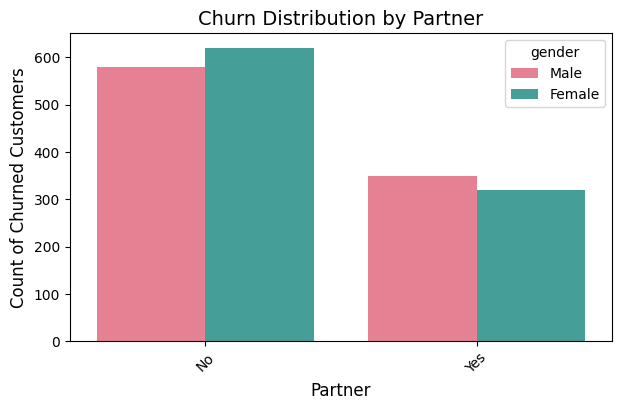

In [42]:
custom_uniplot(new_df1_target1, col='Partner', title="Churn Distribution by Partner")

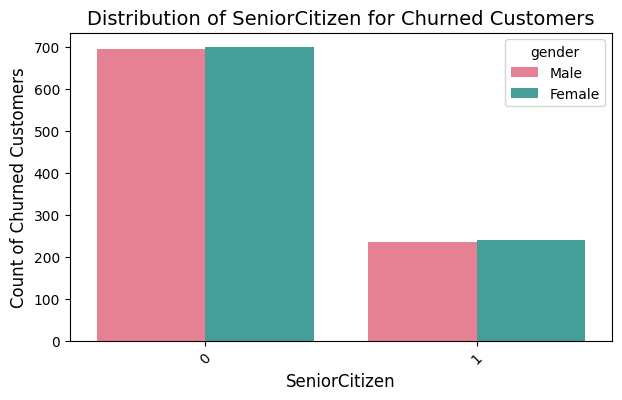

In [43]:
custom_uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## Conclusion

In [44]:
df_telco_encoded.to_csv('tel_churn.csv')